In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [4]:
df =pd.read_csv('train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df['Age'] = df['Age'].fillna(df['Age'].median())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()  # <- add the parentheses!

df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])


In [21]:
# Features for training
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Define input and output
X = df[features]
y = df['Survived']


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 42, test_size=0.3)


In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000)
model.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [28]:
y_pred = model.predict(X_test)

print('Accuracy :', accuracy_score(y_test,y_pred))
print('Classification report ;',classification_report(y_test, y_pred))
print('Confusion Matrix :', confusion_matrix(y_test, y_pred))

Accuracy : 0.8134328358208955
Classification report ;               precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

Confusion Matrix : [[137  20]
 [ 30  81]]


In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 45)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=45)

In [34]:
y_pred = model.predict(X_test)

print('Accuracy :', accuracy_score(y_test,y_pred))
print('Consusion Matrix :', confusion_matrix(y_test,y_pred))

print('Classification Report:\n', classification_report(y_test, y_pred))



Accuracy : 0.753731343283582
Consusion Matrix : [[124  33]
 [ 33  78]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       157
           1       0.70      0.70      0.70       111

    accuracy                           0.75       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.75      0.75      0.75       268



In [60]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [61]:
y_pred = model.predict(X_test)

print("Accuracy :",accuracy_score(y_test,y_pred))
print("Confusion Matrix :", confusion_matrix(y_test,y_pred))
print("Classification Report :", classification_report(y_test, y_pred))

Accuracy : 0.7089552238805971
Confusion Matrix : [[131  26]
 [ 52  59]]
Classification Report :               precision    recall  f1-score   support

           0       0.72      0.83      0.77       157
           1       0.69      0.53      0.60       111

    accuracy                           0.71       268
   macro avg       0.70      0.68      0.69       268
weighted avg       0.71      0.71      0.70       268



In [66]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)




RandomForestClassifier()

In [68]:
y_pred = model.predict(X_test)

print("Accuracy :",accuracy_score(y_test,y_pred))
print("Confusion Matrix :", confusion_matrix(y_test,y_pred))
print("Classification Report :", classification_report(y_test, y_pred))

Accuracy : 0.7761194029850746
Confusion Matrix : [[128  29]
 [ 31  80]]
Classification Report :               precision    recall  f1-score   support

           0       0.81      0.82      0.81       157
           1       0.73      0.72      0.73       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [47]:
df.drop(columns=['Ticket', 'Cabin'], inplace=True)



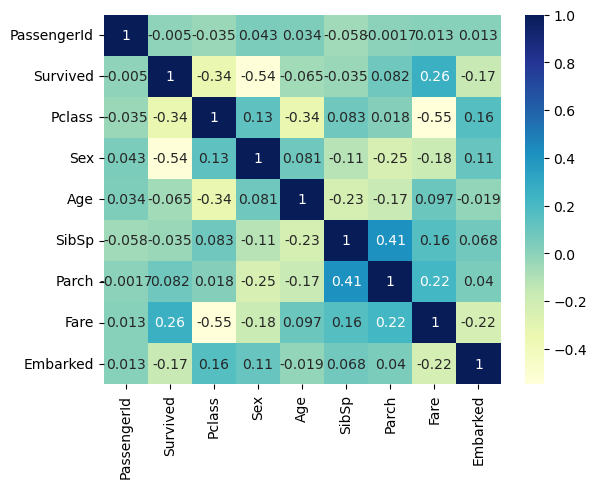

In [53]:
corr_matrix = df.corr(numeric_only = True)

sns.heatmap(corr_matrix,cmap='YlGnBu',annot = True)
sns.title=('Feture correlation Heatmap')
plt.show()

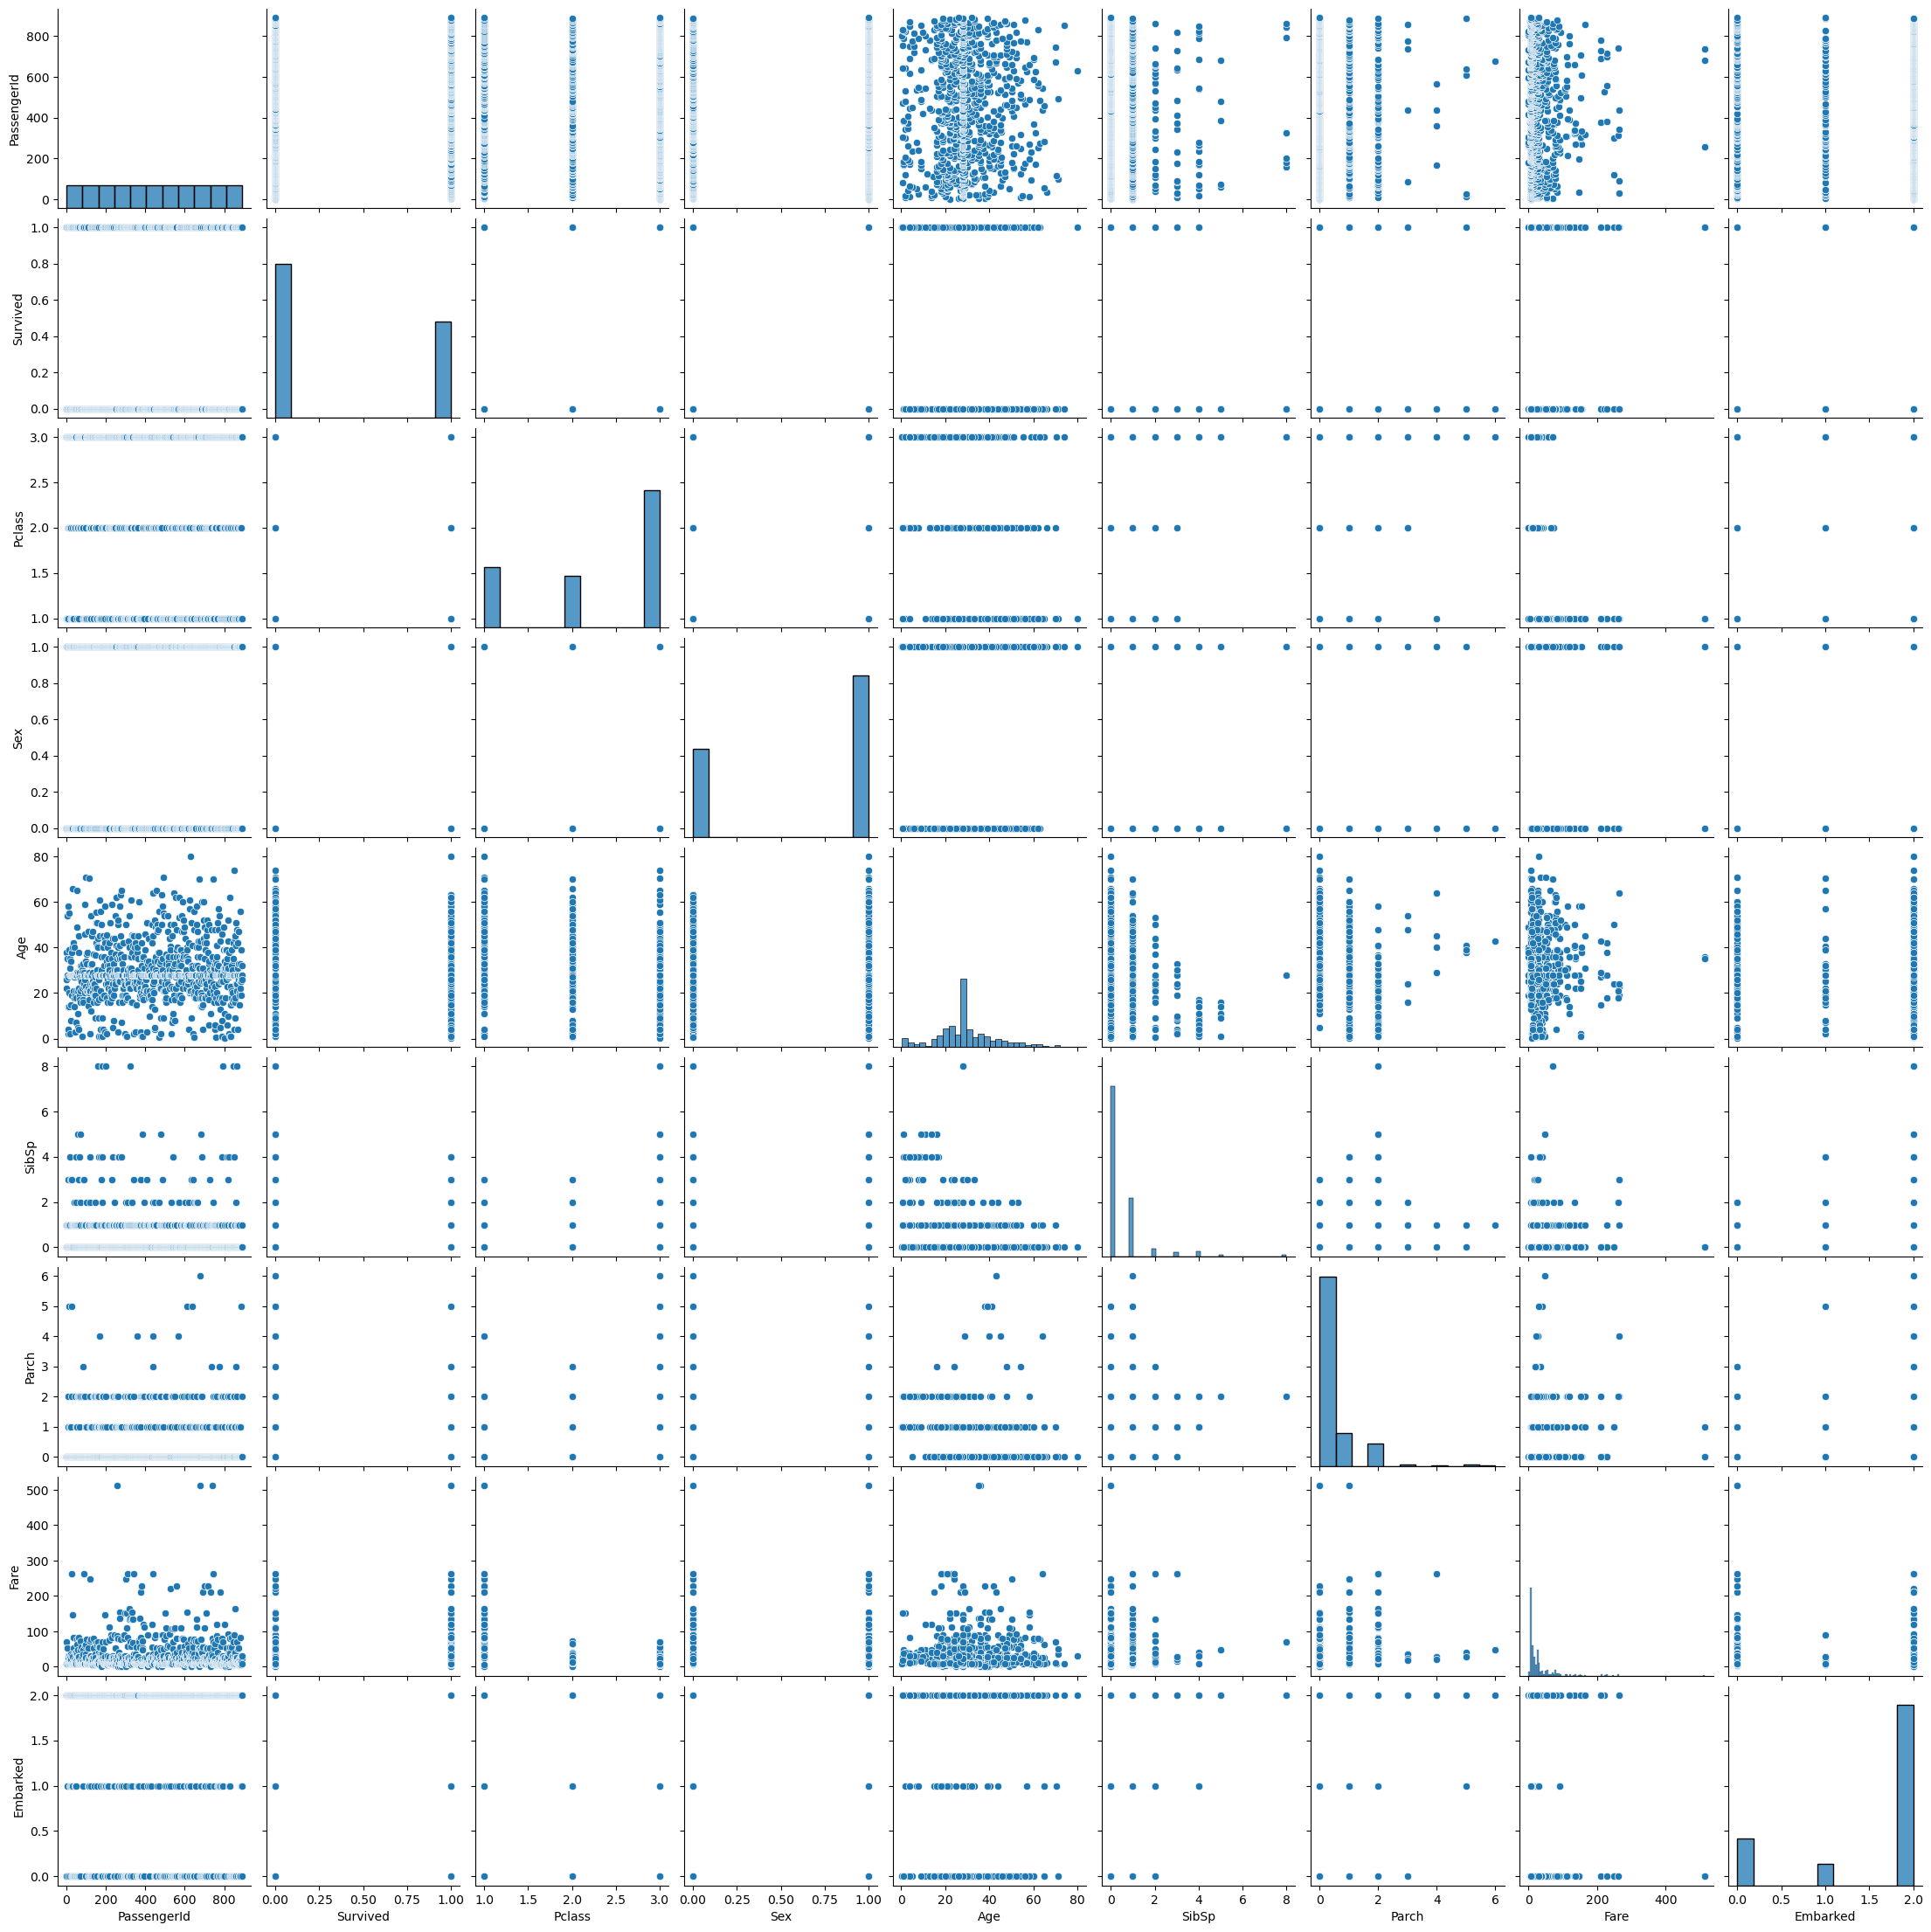

In [58]:
sns.pairplot(df)
plt.show()